The Susceptible-Infectious-Recovered (SIR) model is a set of ordinary differential equations (ODEs) that describe the dynamics of an infectious disease spreading through a population. The equations are as follows:

\begin{align*}
    & S(t) \text{ be the number of susceptible individuals at time } t \\
    & I(t) \text{ be the number of infectious individuals at time } t \\
    & R(t) \text{ be the number of recovered individuals at time } t \\
    & N \text{ be the total population}
\end{align*}

The SIR model equations are given by:

\begin{align*}
    \frac{dS}{dt} & = - \beta . \frac{S.I}{N} \\
    \frac{dI}{dt} & = \beta . \frac{S.I}{N} - \gamma . I \\
    \frac{dR}{dt} & = \gamma . I
\end{align*}

Where:

\begin{align*}
    & \beta \text{ is the transmission rate (rate of spread of the disease)} \\
    & \gamma \text{ is the recovery rate} \\
    & \frac{S.I}{N} \text{ represents the rate at which susceptible individuals become infected} \\
    & \gamma . I \text{ represents the rate at which infected individuals recover}
\end{align*}

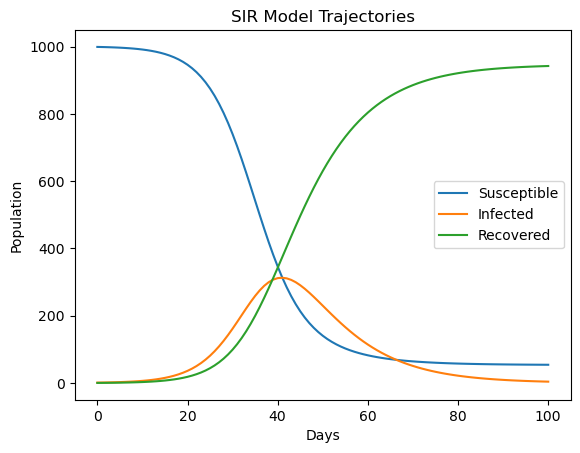

Mutual Information between Susceptible and Infected: 0.0003747054417320223


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sir_model(beta, gamma, total_population, initial_infected, days):
    # Initial conditions
    susceptible = total_population - initial_infected
    infected = initial_infected
    recovered = 0
    
    # Lists to store the trajectory
    susceptible_traj = [susceptible]
    infected_traj = [infected]
    recovered_traj = [recovered]
    
    for day in range(days):
        # Calculate new infections and recoveries
        new_infections = beta * susceptible * infected / total_population
        new_recoveries = gamma * infected
        
        # Update the state variables
        susceptible -= new_infections
        infected += new_infections - new_recoveries
        recovered += new_recoveries
        
        # Append the current state to the trajectory
        susceptible_traj.append(susceptible)
        infected_traj.append(infected)
        recovered_traj.append(recovered)
    
    return susceptible_traj, infected_traj, recovered_traj

def compute_mutual_information(trajectory1, trajectory2, bins=10):
    # Compute histograms
    hist_1, _ = np.histogram(trajectory1, bins=bins, density=True)
    hist_2, _ = np.histogram(trajectory2, bins=bins, density=True)
    
    # Compute joint histogram
    joint_hist, _, _ = np.histogram2d(trajectory1, trajectory2, bins=bins, density=True)
    
    # Compute mutual information
    eps = np.finfo(float).eps
    mutual_info = np.sum(joint_hist * np.log2((joint_hist + eps) / (np.outer(hist_1, hist_2) + eps)))
    
    return mutual_info

# Parameters for the SIR model
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
total_population = 1000
initial_infected = 1
days = 100

# Simulate the SIR model
susceptible_traj, infected_traj, recovered_traj = sir_model(beta, gamma, total_population, initial_infected, days)

# Compute mutual information between susceptible and infected trajectories
mutual_info = compute_mutual_information(susceptible_traj, infected_traj)

# Plot the trajectories
plt.plot(susceptible_traj, label='Susceptible')
plt.plot(infected_traj, label='Infected')
plt.plot(recovered_traj, label='Recovered')
plt.title('SIR Model Trajectories')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.show()

# Print the computed mutual information
print(f'Mutual Information between Susceptible and Infected: {mutual_info}')


**Infection Process:**

$$ \frac{dI_{i}}{dt} = \beta \sum_{j \in N(i)} (1 - \delta_{s_{j}, 0}) - \gamma I_{i} $$

This equation represents the rate of change of the number of infected individuals ($I_{i}$) at node $i$. The term $\beta$ represents the infection rate, and $\gamma$ is the recovery rate. The sum is taken over neighbors of node $i$, and $\delta_{s_{j}, 0})$ is the Kronecker delta, which is 1 if $s_{j} $(state of neighbor $j$) is infectious and 0 otherwise.

**Recovery Process:**

$$ \frac{dS_{i}}{dt} = - \beta \sum_{j \in N(i)} (1 - \delta_{s_{j}, 0}) + \gamma I_{i} $$

This equation represents the rate of change of the number of susceptible individuals ($S_{i}$) at node $i$. It includes terms related to the infection process and the recovery of infected individuals.

Here, $s_{j}$ represents the state of node $j$ (1 if infectious, 0 if susceptible).

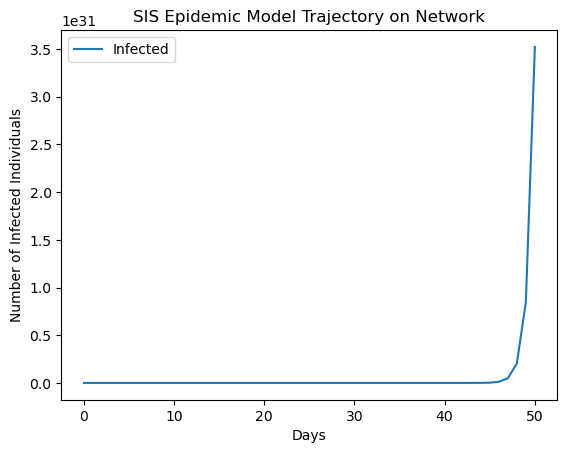

Mutual Information between Infected at Day t and Day t+1: 0.0


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def sis_epidemic_model(graph, beta, gamma, initial_infected, days):
    # Initialize node states (0 for susceptible, 1 for infected)
    node_states = np.zeros(graph.number_of_nodes())
    node_states[:initial_infected] = 1
    
    # Lists to store the trajectory
    infected_traj = [np.sum(node_states)]
    
    for day in range(days):
        new_states = np.zeros(graph.number_of_nodes())
        
        for node in graph.nodes():
            neighbors = list(graph.neighbors(node))
            infected_neighbors = sum(node_states[neighbor] for neighbor in neighbors)
            
            # Infection process
            new_states[node] = beta * infected_neighbors - gamma * node_states[node]
        
        # Update node states
        node_states += new_states
        infected_traj.append(np.sum(node_states))
    
    return infected_traj

def compute_mutual_information(trajectory1, trajectory2, bins=10):
    # Compute histograms
    hist_1, _ = np.histogram(trajectory1, bins=bins, density=True)
    hist_2, _ = np.histogram(trajectory2, bins=bins, density=True)
    
    # Compute joint histogram
    joint_hist, _, _ = np.histogram2d(trajectory1, trajectory2, bins=bins, density=True)
    
    # Compute mutual information
    eps = np.finfo(float).eps
    mutual_info = np.sum(joint_hist * np.log2((joint_hist + eps) / (np.outer(hist_1, hist_2) + eps)))
    
    return mutual_info

# Generate a random network (you can use your own network)
graph = nx.erdos_renyi_graph(100, 0.1)

# Parameters for the SIS model
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
initial_infected = 5
days = 50

# Simulate the SIS model
infected_traj = sis_epidemic_model(graph, beta, gamma, initial_infected, days)

# Compute mutual information between infected trajectories
mutual_info = compute_mutual_information(infected_traj[:-1], infected_traj[1:])

# Plot the infected trajectory
plt.plot(infected_traj, label='Infected')
plt.title('SIS Epidemic Model Trajectory on Network')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.show()

# Print the computed mutual information
print(f'Mutual Information between Infected at Day t and Day t+1: {mutual_info}')


**Infection Process:**

$$ \frac{dI_{i}}{dt} = \beta \sum_{j \in N(i)} (1 - \delta_{s_{j}, 0}) - \gamma I_{i} + \sigma \frac{dW_{i}}{dt} $$

**Recovery Process:**

$$ \frac{dS_{i}}{dt} = - \beta \sum_{j \in N(i)} (1 - \delta_{s_{j}, 0}) + \gamma I_{i} + \sigma \frac{dW_{i}}{dt} $$

where $ dW_{i} $ is a Wiener process (Brownian motion) representing the Gaussian white noise, and $ \sigma $ is the noise intensity.

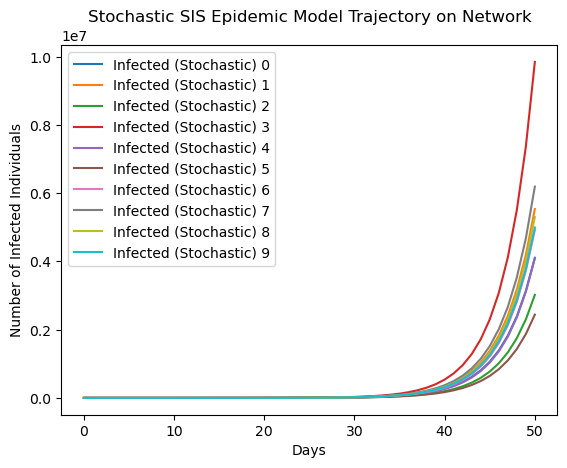

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def sis_epidemic_model_stochastic(graph, beta, gamma, sigma, initial_infected, days, dt):
    # Initialize node states (0 for susceptible, 1 for infected)
    node_states = np.zeros(graph.number_of_nodes())
    node_states[:initial_infected] = 1
    
    # Lists to store the trajectory
    infected_traj = [np.sum(node_states)]
    
    for day in range(days):
        new_states = np.zeros(graph.number_of_nodes())
        
        for node in graph.nodes():
            neighbors = list(graph.neighbors(node))
            infected_neighbors = sum(node_states[neighbor] for neighbor in neighbors)
            
            # Infection process with Gaussian white noise
            dI = (beta * infected_neighbors - gamma * node_states[node]) * dt + sigma * np.sqrt(dt) * np.random.normal()
            
            # Update node states
            new_states[node] = dI
        
        node_states += new_states
        infected_traj.append(np.sum(node_states))
    
    return infected_traj

# Parameters for the SIS model with stochasticity
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
sigma = 0.05  # noise intensity
initial_infected = 5
days = 50
dt = 0.1  # time step for Euler-Maruyama method

for i in range(10):

    # Generate a random network (you can use your own network)
    graph = nx.erdos_renyi_graph(100, 0.1)

    # Simulate the stochastic SIS model using Euler-Maruyama method
    infected_traj_stochastic = sis_epidemic_model_stochastic(graph, beta, gamma, sigma, initial_infected, days, dt)

    # Plot the infected trajectory
    plt.plot(infected_traj_stochastic, label='Infected (Stochastic) ' + str(i))
    
plt.title('Stochastic SIS Epidemic Model Trajectory on Network')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.show()


**Trajectory mutual information**

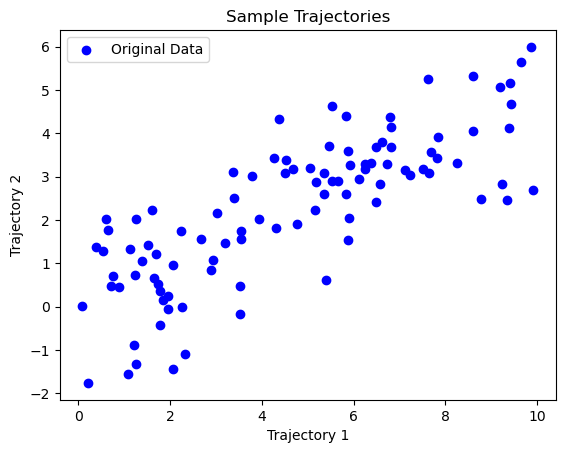

Mutual Information: 5.174818418195217


In [4]:
import numpy as np

def discretize_trajectory(trajectory, bins):
    # Discretize the Trajectories
    return np.digitize(trajectory, bins)

def compute_histogram(data1, data2, bins):
    # Compute Joint and Marginal Distributions
    joint_hist, _, _ = np.histogram2d(data1, data2, bins=bins, density=True)
    marginal_hist1, _ = np.histogram(data1, bins=bins, density=True)
    marginal_hist2, _ = np.histogram(data2, bins=bins, density=True)

    return joint_hist, marginal_hist1, marginal_hist2

def compute_mutual_information(joint_hist, marginal_hist1, marginal_hist2):
    # Calculate Mutual Information:
    eps = np.finfo(float).eps
    mutual_info = np.sum(joint_hist * np.log2((joint_hist + eps) / (np.outer(marginal_hist1, marginal_hist2) + eps)))
    
    return mutual_info

import matplotlib.pyplot as plt

# Sample trajectories
trajectory1 = np.random.rand(100) * 10
trajectory2 = 0.5 * trajectory1 + np.random.randn(100)

# Discretize trajectories
bins = np.linspace(0, 10, 20)
discrete_trajectory1 = discretize_trajectory(trajectory1, bins)
discrete_trajectory2 = discretize_trajectory(trajectory2, bins)

# Compute joint and marginal distributions
joint_hist, marginal_hist1, marginal_hist2 = compute_histogram(discrete_trajectory1, discrete_trajectory2, bins)

# Compute mutual information
mutual_info = compute_mutual_information(joint_hist, marginal_hist1, marginal_hist2)

# Plot the trajectories
plt.scatter(trajectory1, trajectory2, c='b', label='Original Data')
plt.title('Sample Trajectories')
plt.xlabel('Trajectory 1')
plt.ylabel('Trajectory 2')
plt.legend()
plt.show()

# Print the computed mutual information
print(f'Mutual Information: {mutual_info}')


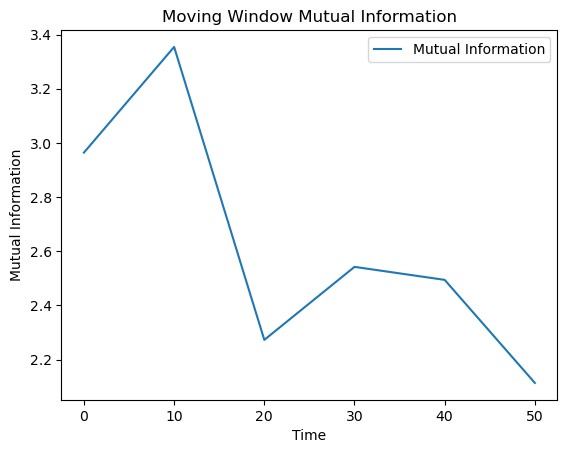

In [5]:
import numpy as np

def moving_window_mutual_information(trajectory1, trajectory2, window_size, step_size):
    mutual_info_values = []

    for i in range(0, len(trajectory1) - window_size + 1, step_size):
        window_data1 = trajectory1[i:i+window_size]
        window_data2 = trajectory2[i:i+window_size]

        discrete_window_data1 = discretize_trajectory(window_data1, bins)
        discrete_window_data2 = discretize_trajectory(window_data2, bins)

        joint_hist, marginal_hist1, marginal_hist2 = compute_histogram(discrete_window_data1, discrete_window_data2, bins)

        mutual_info = compute_mutual_information(joint_hist, marginal_hist1, marginal_hist2)
        mutual_info_values.append(mutual_info)

    return mutual_info_values

# Sample time series data
time_points = np.arange(0, 10, 0.1)
trajectory1 = np.sin(time_points)
trajectory2 = 0.5 * trajectory1 + np.random.normal(0, 0.1, len(time_points))

# Set parameters
window_size = 50
step_size = 10

# Compute moving window mutual information
mutual_info_values = moving_window_mutual_information(trajectory1, trajectory2, window_size, step_size)

# Plot the mutual information values over time
plt.plot(np.arange(0, len(mutual_info_values) * step_size, step_size), mutual_info_values, label='Mutual Information')
plt.title('Moving Window Mutual Information')
plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.legend()
plt.show()